<a href="https://colab.research.google.com/github/YasiruMM/Medicine-Prediction-Grp-22/blob/Cardiovascular-Data-Cleaning/Stock_Gen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path= '/content/drive/My Drive/DSGP/updated_outlierProcessed.csv'
#Load the Excel file into a DataFrame
df = pd.read_csv(file_path)


In [ ]:
# Calculate the mean sales and coefficient of variance (CV) for each drug
df['Mean Sales'] = df.groupby('Drug Name')['Sales'].transform('mean')
df['CV'] = df.groupby('Drug Name')['Sales'].transform(lambda x: x.std() / x.mean() * 100)

# Assign Buffer Percentage based on CV

In [ ]:
# buffer percentage based on CV
def buffer_percentage(cv):
    if cv <= 20:
        return 20
    elif 20 < cv <= 50:
        return 30
    else:
        return 50

In [ ]:
#calculate buffer percentage
df['Buffer Percentage'] = df['CV'].apply(buffer_percentage)

In [ ]:
# Calculate buffer stock
df['Buffer Stock'] = df['Buffer Percentage'] / 100 * df['Mean Sales']

In [ ]:
from google.colab import files
df.to_csv('Buffer_Stock.csv', index=False)
files.download('Buffer_Stock.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# wisnorization to Buffer Stock

In [ ]:
# Apply capping to Buffer Stock values
buffer_stock_lower_cap = df['Buffer Stock'].quantile(0.05)
buffer_stock_upper_cap = df['Buffer Stock'].quantile(0.95)
df['Buffer Stock'] = df['Buffer Stock'].clip(lower=buffer_stock_lower_cap, upper=buffer_stock_upper_cap)

# Round Buffer Stock to the nearest integer
df['Buffer Stock'] = df['Buffer Stock'].round().astype(int)

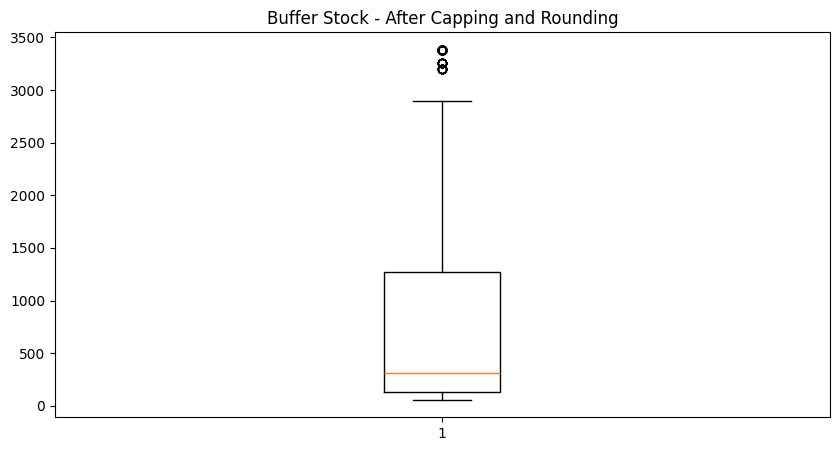

In [ ]:
# Plot Buffer Stock after capping
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.boxplot(df['Buffer Stock'])
plt.title('Buffer Stock - After Capping and Rounding')
plt.show()

In [ ]:
df.to_csv('updated_Finalised_Cardio_Data.csv', index=False)
files.download('updated_Finalised_Cardio_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>